In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [8]:
# ==========================================
# 1. Import the dataset
# ==========================================
# Change 'heart.csv' to the actual path of your local file
try:
    df = pd.read_csv(r"F:\11 semester Artificial intelligence nural network\11 lab trial 1 final\7. alzheimers_disease_data.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is in the project folder.")
  

Dataset loaded successfully.


In [9]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [21]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 1. Import the dataset
# file_path = '7. alzheimers_disease_data.csv'
# df = pd.read_csv(file_path)

# # Preliminary cleaning: Drop non-predictive columns
# if 'PatientID' in df.columns:
#     df = df.drop('PatientID', axis=1)
# if 'DoctorInCharge' in df.columns:
#     df = df.drop('DoctorInCharge', axis=1)

# print("Dataset Loaded Successfully.")
# print(df.head())
# # df.info()

C:\Users\islam\AppData\Local\Temp\ipykernel_14856\3953494431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')


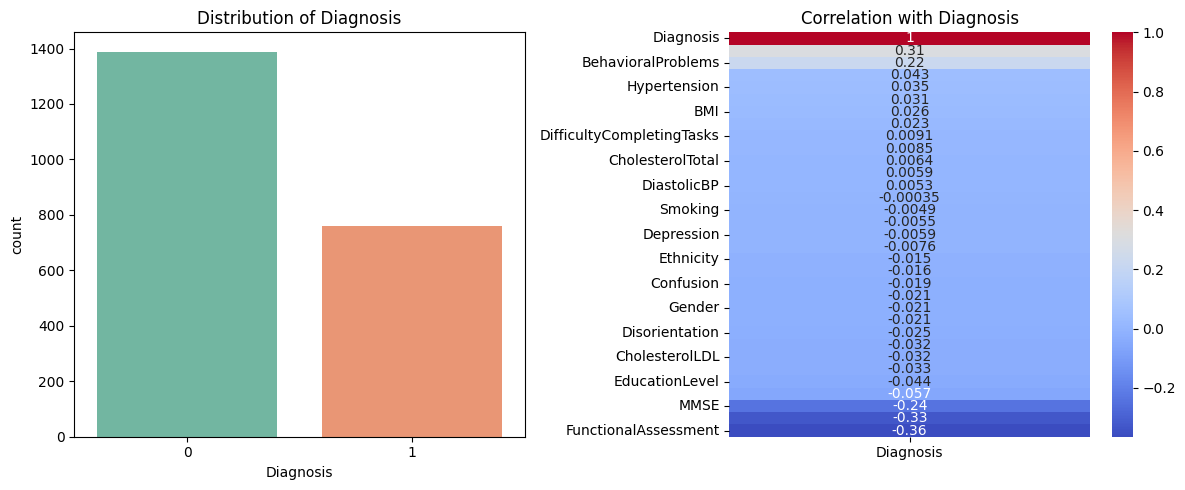

In [11]:
# 2. Dataset visualization
plt.figure(figsize=(12, 5))

# Plot target distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis')

# Correlation heatmap (subset for readability)
plt.subplot(1, 2, 2)
sns.heatmap(df.corr()[['Diagnosis']].sort_values(by='Diagnosis', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Diagnosis')
plt.tight_layout()
plt.show()

Original class distribution: [1389  760]


C:\Users\islam\AppData\Local\Temp\ipykernel_14856\2588288963.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='viridis')


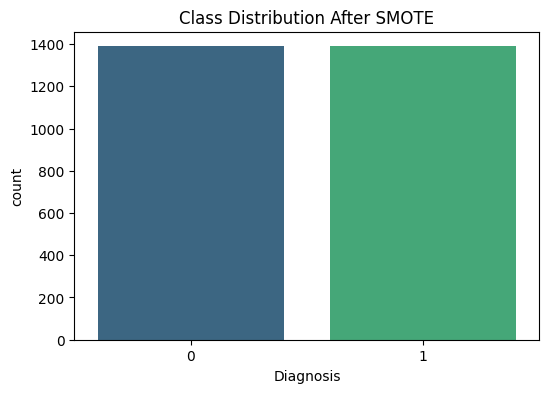

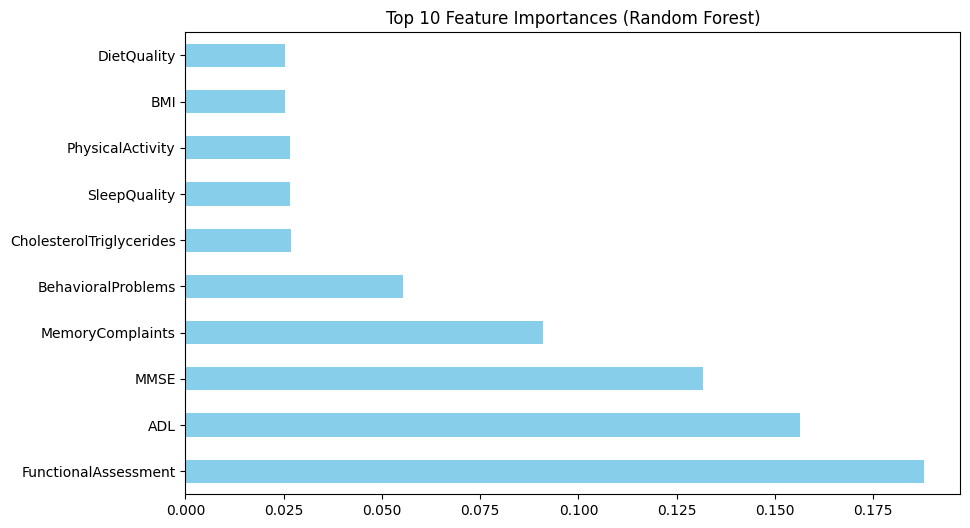

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

# i. Handling Missing values
df = df.fillna(df.median(numeric_only=True))

# iii. Encoding Categorical data
# Note: Gender and Ethnicity are already numerical. 
# EducationLevel (0-3) is ordinal, so we treat it as numerical or encode if needed.
# For demonstration, we'll ensure the target is clean.
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

# Separate Features and Target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# ii. Normalization: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# iv. Handling Imbalanced data
print("Original class distribution:", np.bincount(y))
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Figure for imbalanced data handling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_res, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.show()

# v. Finding feature importance (Random Forest and Decision Tree)
rf_model = RandomForestClassifier(random_state=42).fit(X_res, y_res)
dt_model = DecisionTreeClassifier(random_state=42).fit(X_res, y_res)

# vi. Show necessary figures for feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# 4. Split the dataset into 20:80
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 2222
Testing set size: 556


In [14]:
from sklearn.linear_model import LogisticRegression

# 5. Train ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.



--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       273
           1       0.82      0.82      0.82       283

    accuracy                           0.81       556
   macro avg       0.81      0.81      0.81       556
weighted avg       0.81      0.81      0.81       556



<Figure size 1000x800 with 0 Axes>

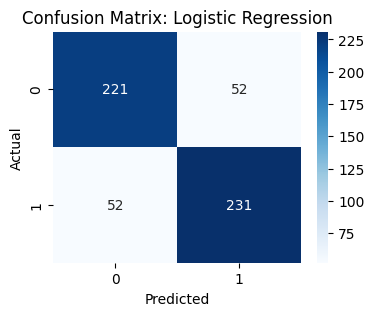


--- Decision Tree Report ---
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       273
           1       0.91      0.90      0.90       283

    accuracy                           0.90       556
   macro avg       0.90      0.90      0.90       556
weighted avg       0.90      0.90      0.90       556



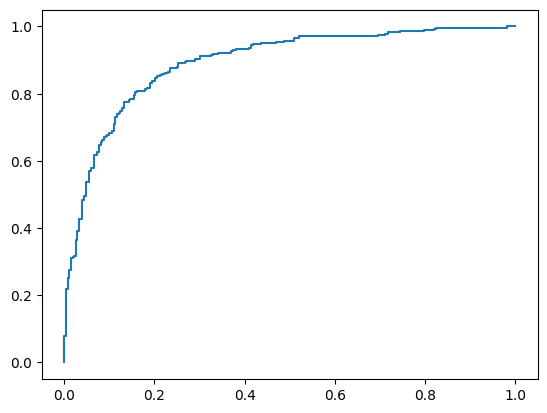

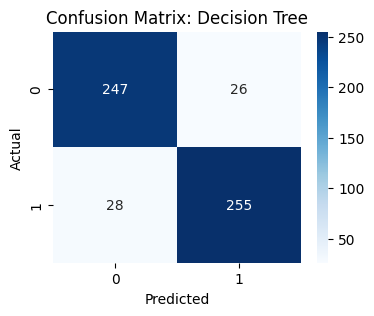


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       273
           1       0.98      0.93      0.96       283

    accuracy                           0.96       556
   macro avg       0.96      0.96      0.96       556
weighted avg       0.96      0.96      0.96       556



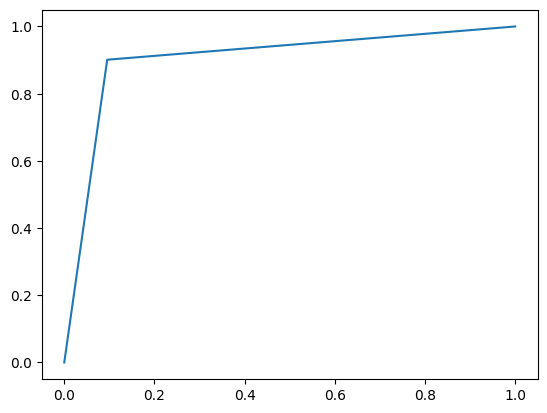

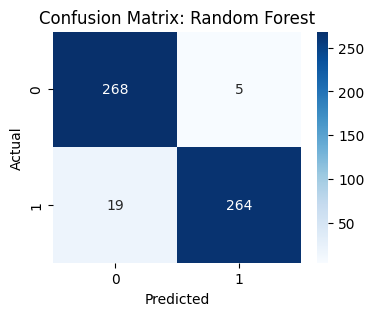

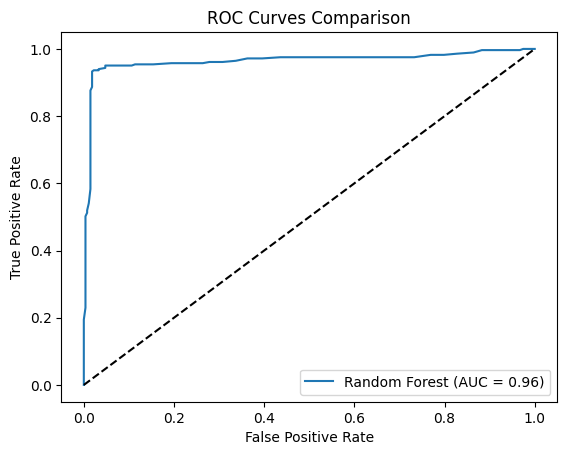

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 6. Evaluation
plt.figure(figsize=(10, 8)) # For the cumulative ROC plot

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"\n--- {name} Report ---")
    # ii. Classification report (table)
    print(classification_report(y_test, y_pred))
    
    # i. Confusion matrix (fig)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # iii. ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(10) # Target the main ROC figure
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
plt.figure(10)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()